In [1]:
import pandas as pd

# Load the transaction data
df = pd.read_csv('transactions_data.csv')

# Show first few rows
df.head()


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('transactions_data.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Clean 'amount' column: remove $ and convert to float
df['amount'] = df['amount'].replace(r'[\$,]', '', regex=True).astype(float)


df.head()



,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


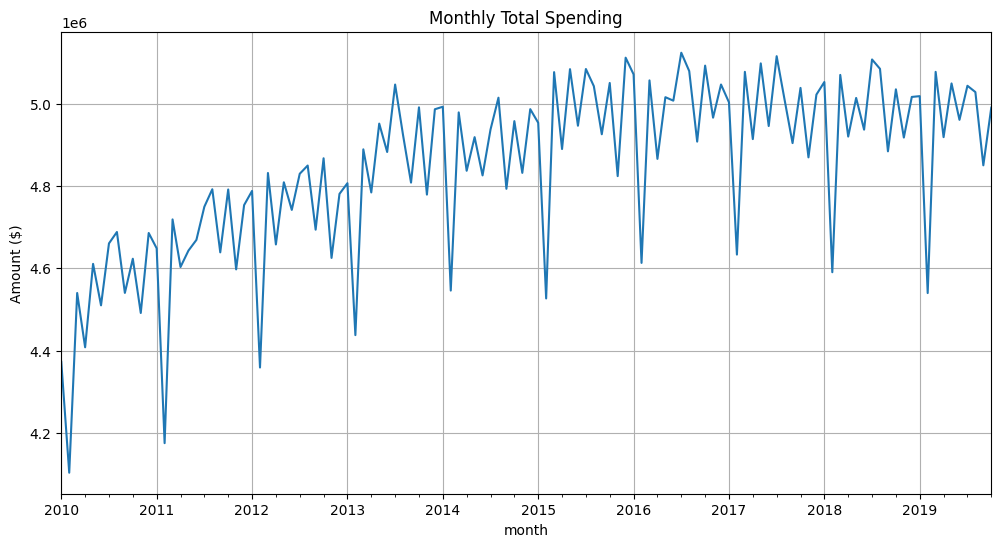

In [4]:
# Create a new column for just the year and month
df['month'] = df['date'].dt.to_period('M')

# Group by month and calculate total transaction amount
monthly_totals = df.groupby('month')['amount'].sum()

# Convert period to timestamp for plotting
monthly_totals.index = monthly_totals.index.to_timestamp()

# Plot the trend
import matplotlib.pyplot as plt

monthly_totals.plot(figsize=(12,6), title='Monthly Total Spending', ylabel='Amount ($)')
plt.grid(True)
plt.show()


In [6]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------------------- ------ 8.1/9.8 MB 48.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 32.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


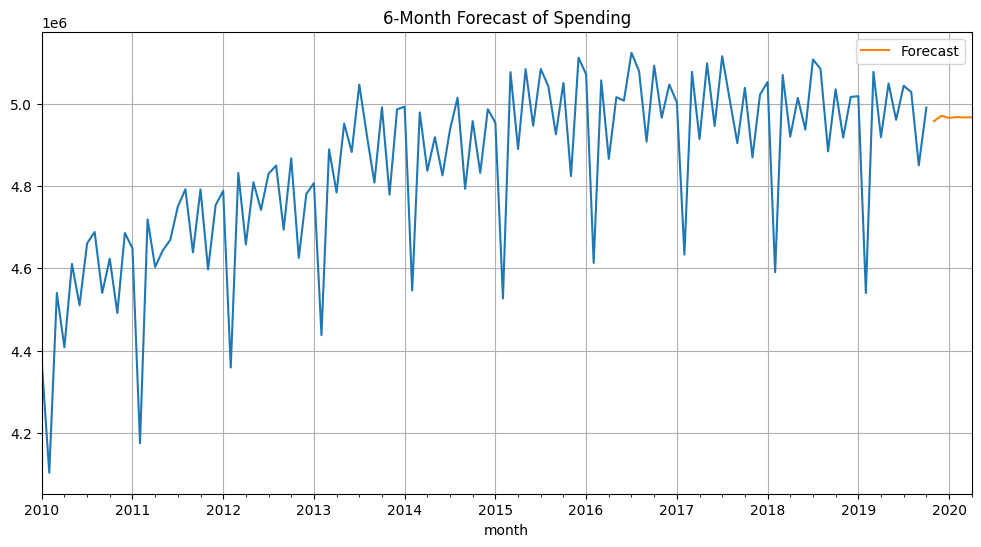

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (auto settings for now)
model = ARIMA(monthly_totals, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot actual + forecast
monthly_totals.plot(label='Historical', figsize=(12,6))
forecast.index = pd.date_range(start=monthly_totals.index[-1] + pd.offsets.MonthBegin(1), periods=6, freq='MS')
forecast.plot(label='Forecast', legend=True, title='6-Month Forecast of Spending')
plt.grid(True)
plt.show()


In [8]:
# Save monthly totals to a CSV for Power BI
monthly_totals.to_csv('monthly_totals.csv', index=True)

